In [1]:
from pygam import LinearGAM, s, f
from datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_original, df_train, df_test = load_wine()
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
779,7.1,0.52,0.03,2.6,0.076,21.0,92.0,0.99745,3.50,0.60,9.8,5
185,8.9,0.31,0.57,2.0,0.111,26.0,85.0,0.99710,3.26,0.53,9.7,5
309,7.4,0.29,0.38,1.7,0.062,9.0,30.0,0.99680,3.41,0.53,9.5,6
1513,6.4,0.56,0.15,1.8,0.078,17.0,65.0,0.99294,3.33,0.60,10.5,6
1185,7.0,0.43,0.30,2.0,0.085,6.0,39.0,0.99346,3.33,0.46,11.9,6


In [3]:
train_X = df_train.drop(['target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']
original_X = df_original.drop(['target'], axis=1)
original_y = df_original['target']
features = train_X.columns

In [4]:
scaler = StandardScaler().fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), columns=features)
test_X = pd.DataFrame(scaler.transform(test_X), columns=features)

In [5]:
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

## Spline terms

In [6]:
model = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10))
model.gridsearch(train_X.values, train_y.values)
model.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     33.9221
Link Function:                     IdentityLink Log Likelihood:                                 -1560.3325
Number of Samples:                         1279 AIC:                                             3190.5092
                                                AICc:                                            3192.5275
                                                GCV:                                                0.4191
                                                Scale:                                              0.3991
                                                Pseudo R-Squared

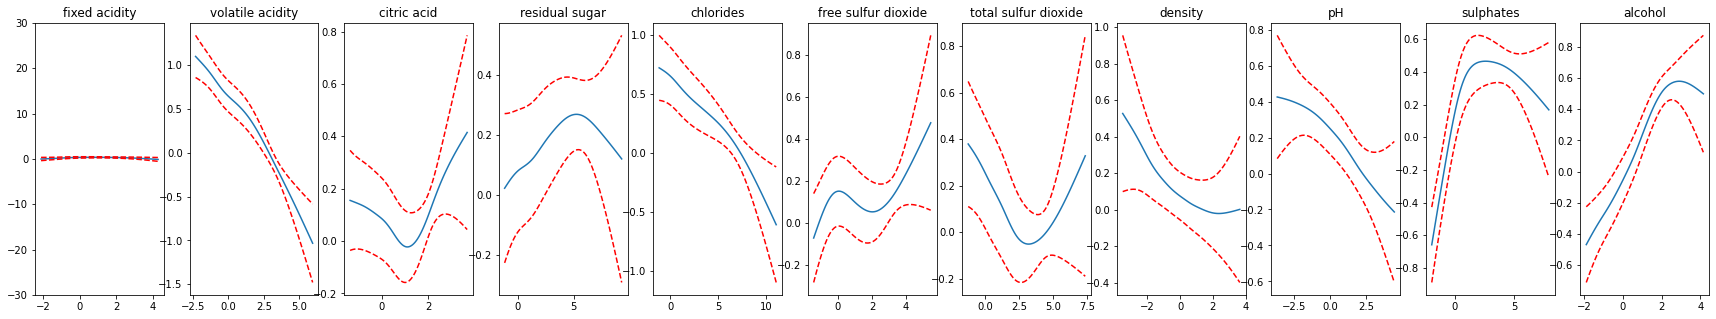

In [7]:
titles = train_X.columns

fig, axs = plt.subplots(1, len(titles), figsize=(30,5))

for i, ax in enumerate(axs):
    XX = model.generate_X_grid(term=i)
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

In [8]:
# feature z feature selection
model = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5))
model.gridsearch(train_X[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol']].values, train_y.values)
model.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      18.692
Link Function:                     IdentityLink Log Likelihood:                                 -1574.0623
Number of Samples:                         1279 AIC:                                             3187.5085
                                                AICc:                                            3188.1561
                                                GCV:                                                0.4177
                                                Scale:                                              0.4067
                                                Pseudo R-Squared

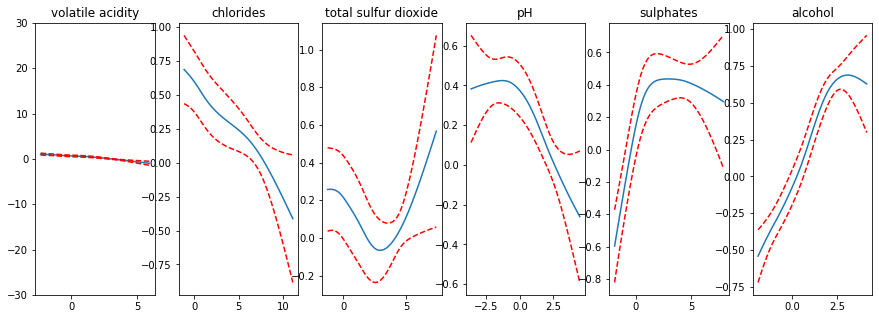

In [9]:
# holding all fixed, economy slightly increase happiness
titles = train_X[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol']].columns

fig, axs = plt.subplots(1, len(titles), figsize=(15,5))

for i, ax in enumerate(axs):
    XX = model.generate_X_grid(term=i)
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])